**Distance Based Methods - Outlier Detection**

**1.Euclidean Distance**

Euclidean Distance is a simple yet effective method for detecting outliers based on the distance between data points. 

In this method, the distance between each point and its nearest neighbors (or the mean) is calculated. 
Points that are far from the rest of the data are considered outliers. 

This method is particularly useful when data points are expected to cluster around a central region, and any point far from the cluster is considered an anomaly.

**Steps for Outlier Detection Using Euclidean Distance:**
    
**Calculate the Euclidean distance** between each data point and the center of the data (e.g., the mean or the centroid of a cluster).

**Set a threshold:** Any data point whose distance from the center exceeds a certain threshold is considered an outlier.

**Identify outliers:** Points with a high Euclidean distance are labeled as outliers.


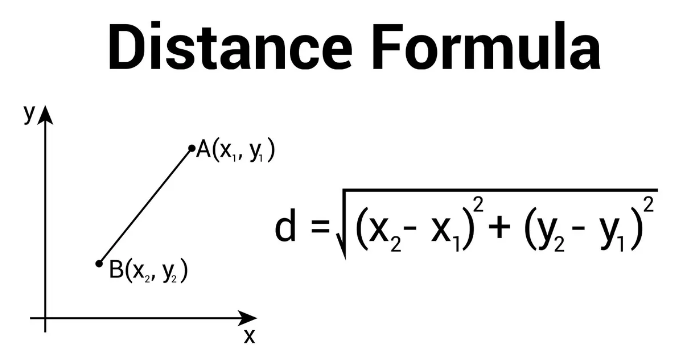


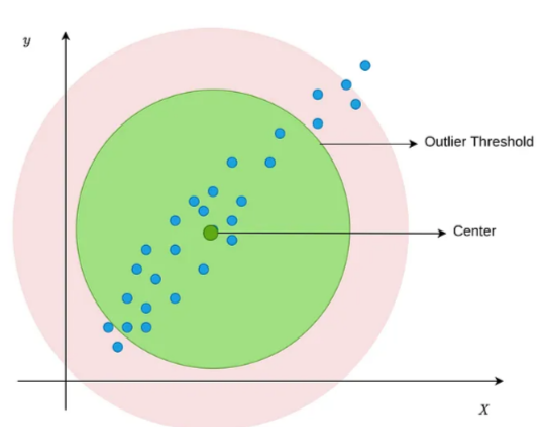

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.neighbors import NearestNeighbors

# Generate normal data (100 points from a normal distribution)
X_normal = np.random.randn(100, 2)  # 100 points in 2D space

# Generate outlier data (10 points far from the center)
X_outliers = np.random.uniform(low=-10, high=10, size=(10, 2))

# Combine normal and outlier data
X_combined = np.vstack([X_normal, X_outliers])
X_combined.shape

In [7]:
# Compute the centroid (mean) of the normal data
centroid = np.mean(X_normal, axis=0)

# Calculate Euclidean distances from the centroid
distances = np.linalg.norm(X_combined - centroid, axis=1)


In [8]:
# Set the threshold distance (e.g., 2 standard deviations above the mean distance)
threshold = np.mean(distances) + 2 * np.std(distances)

# Identify outliers
outliers = X_combined[distances > threshold]


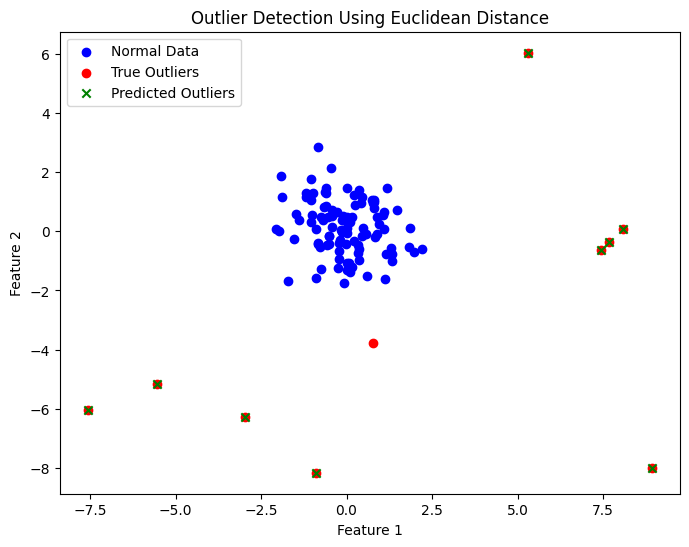

In [9]:
# Plot the normal data (blue) and outliers (red)
plt.figure(figsize=(8, 6))

# Plot normal data points
plt.scatter(X_normal[:, 0], X_normal[:, 1], color='blue', label='Normal Data')

# Plot outlier data points
plt.scatter(X_outliers[:, 0], X_outliers[:, 1], color='red', label='True Outliers')

# Highlight the predicted outliers
plt.scatter(outliers[:, 0], outliers[:, 1], color='green', label='Predicted Outliers', marker='x')

# Labels and legend
plt.title("Outlier Detection Using Euclidean Distance")
plt.xlabel("Feature 1")
plt.ylabel("Feature 2")
plt.legend()

# Show plot
plt.show()


Euclidean distance-based outlier detection is a simple but effective method, especially when the data is expected to form a dense cluster with a few faraway points. 

This method is effective in low-dimensional spaces but may struggle in high-dimensional data due to the curse of dimensionality (where distances between points become similar as the number of dimensions increases).

**2.Mahalanobis Distance**

It is a measure of the distance between a point and the mean of a distribution, scaled by the covariance of the data.

Mahalanobis distance takes into account the correlations of the data and normalizes the distance based on the data’s variance.

It is particularly useful for detecting outliers in multivariate data.


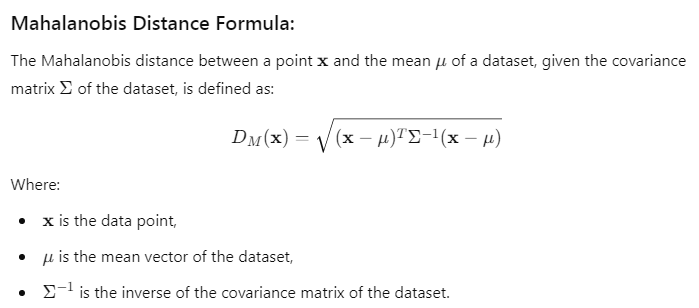


**Steps for Outlier Detection Using Mahalanobis Distance:**
1. Compute the Mean Vector: Calculate the mean vector μ of the dataset.

2. Compute the Covariance Matrix: Calculate the covariance matrix Σ of the dataset.

3. Calculate Mahalanobis Distance: For each data point, compute its Mahalanobis distance from the mean of the dataset.

4. Set a Threshold: Outliers are points that have a Mahalanobis distance above a predefined threshold. This threshold is typically chosen based on the desired confidence level (e.g., 95% confidence corresponds to a distance threshold based on a Chi-Square distribution).

In [17]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.stats import chi2
from numpy.linalg import inv

# Generate normal data (100 points from a normal distribution)
X_normal = np.random.randn(100, 2)  # 100 points in 2D space

# Generate outlier data (10 points far from the center)
X_outliers = np.random.uniform(low=-10, high=10, size=(10, 2))

# Combine the normal and outlier data
X_combined = np.vstack([X_normal, X_outliers])

# Compute the mean and covariance matrix of the combined dataset
mean = np.mean(X_combined, axis=0)
cov_matrix = np.cov(X_combined.T)

# Function to compute Mahalanobis distance
def mahalanobis_distance(x, mean, cov_matrix):
    diff = x - mean
    inv_cov_matrix = inv(cov_matrix)
    return np.sqrt(np.dot(np.dot(diff, inv_cov_matrix), diff.T))

# Compute Mahalanobis distance for all points
distances = np.array([mahalanobis_distance(x, mean, cov_matrix) for x in X_combined])


# Set a threshold based on Chi-square distribution (95% confidence)
threshold = chi2.ppf(0.95, df=2)

# Identify outliers (those with Mahalanobis distance greater than the threshold)
outliers = X_combined[distances > threshold]
outliers


array([[-7.68066796, -9.2278707 ]])

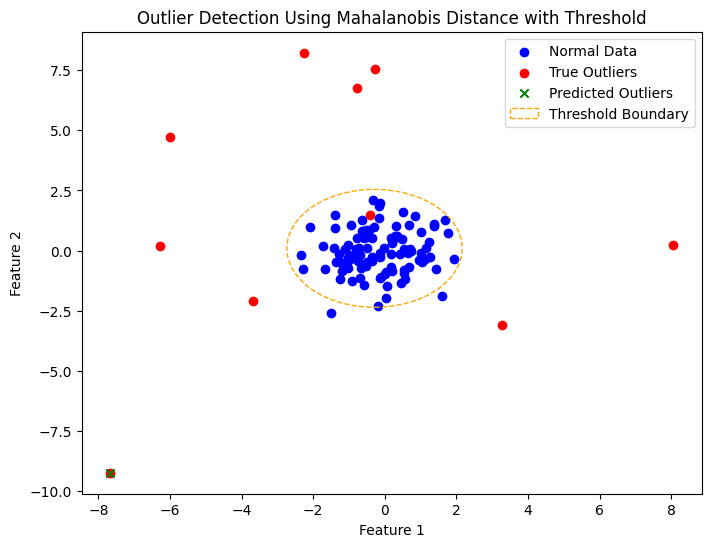

In [22]:
# Plot the normal data (blue) and outliers (red)
plt.figure(figsize=(8, 6))

# Plot normal data points
plt.scatter(X_normal[:, 0], X_normal[:, 1], color='blue', label='Normal Data')

# Plot outlier data points
plt.scatter(X_outliers[:, 0], X_outliers[:, 1], color='red', label='True Outliers')

# Highlight the predicted outliers (points with Mahalanobis distance > threshold)
outliers = X_combined[distances > threshold]
plt.scatter(outliers[:, 0], outliers[:, 1], color='green', label='Predicted Outliers', marker='x')

# Add a circular boundary around the threshold distance (for visualization)
# The threshold is the radius of the circle for 2D data
circle = plt.Circle((mean[0], mean[1]), np.sqrt(threshold), color='orange', fill=False, linestyle='--', label='Threshold Boundary')
plt.gca().add_artist(circle)

# Labels and legend
plt.title("Outlier Detection Using Mahalanobis Distance with Threshold")
plt.xlabel("Feature 1")
plt.ylabel("Feature 2")
plt.legend()

# Show plot
plt.show()


Mahalanobis distance is a powerful tool for outlier detection, especially in multivariate data. 

It takes into account the variance and correlations in the dataset, which makes it more suitable for detecting anomalies in high-dimensional or correlated data.

By setting a threshold based on the Chi-square distribution, we can classify points as outliers. 

This method works well when the data is roughly Gaussian and helps in identifying points that deviate significantly from the distribution of the data.
